In [296]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
from itertools import combinations 

In [297]:
# Investors dataset: Located in Brazil with at least 1 investment. Not including Individual/Angel
df_investors=pd.read_csv("investors.csv")
print(len(df_investors))

# Startups dataset:  Located in Brazil. Funding startups: Seed, Early Stage or Late Stage. Total funding amount higher than USD 300k. 
df_startups=pd.read_csv("companies.csv")
print(len(df_startups))

155
330


In [298]:
df_investors.head()

,Investors,Location
0,Monashees,Brazil
1,ACE Startups,Brazil
2,Kaszek Ventures,Brazil
3,Canary,Brazil
4,Redpoint eventures,Brazil


In [299]:
df_startups.head()

,Organization,Investors
0,VivaReal,"500 Startups, Spark Capital, Monashees, FJ Lab..."
1,QuintoAndar,"SoftBank, General Atlantic, Dragoneer Investme..."
2,Revelo,"FJ Labs, Social Capital, Google Launchpad Acce..."
3,FormaFina,"500 Startups, Plug and Play, Start-Up Chile, R..."
4,Nubank,"Tencent Holdings, Founders Fund, Goldman Sachs..."


In [300]:
# each investors in one row 
# we will use .split() and .stack()

df_startups = (pd.DataFrame(df_startups.Investors.str.split(',').tolist(), index=df_startups.Organization)
               .stack().reset_index([0,"Organization"]))

df_startups.rename({0: 'Investors'}, axis=1, inplace=True)
df_startups["Investors"] = df_startups["Investors"].str.lstrip()

In [301]:
df_startups.head()

,Organization,Investors
0,VivaReal,500 Startups
1,VivaReal,Spark Capital
2,VivaReal,Monashees
3,VivaReal,FJ Labs
4,VivaReal,Kaszek Ventures


In [302]:
# merging the datasets to get only the brazillian investors 

df=pd.merge(df_startups, df_investors, how="outer")

df=df[df["Location"]=="Brazil"].dropna().drop(["Location"],axis=1).reset_index(drop=True)

In [303]:
# we only want startups with more than one investor

# df_aux with the number of investors per startup
df_aux=pd.DataFrame(df["Organization"].value_counts().reset_index())
df_aux.rename({"Organization": 'Number_of_investors',"index":"Organization"}, axis=1, inplace=True)

# merging the datasets 
df=pd.merge(df, df_aux, how="outer")

# filtering the dataset to get only the startups with more than one investors 
df=(df[df["Number_of_investors"]>=2].sort_values(by=['Organization','Investors'])).drop(["Number_of_investors"],axis=1)
    
len(df)

207

In [304]:
df.head()

,Organization,Investors
332,ALavadeira,CRP Companhia de Participações
331,ALavadeira,CVENTURES
280,ARVORE,Eclipseon Ventures
279,ARVORE,IndicatorCapital
158,Aegro,SP Ventures


In [305]:
# list with the possible combinatios of investors 
# we will use it later

# unique investors name 
comb=df["Investors"].sort_values().unique()

# list with all the combinations of investors
cc = pd.Series(list((combinations(comb,2))))


In [306]:
comb

array(['21212', '42K Investimentos', 'ACE Startups', 'Acelera Partners',
       'Anjos do Brasil', 'Astella Investimentos', 'BMG UpTech',
       'BR Startups', 'Barn Investments', 'Bossa Nova Investimentos',
       'Bzplan', 'CRP Companhia de Participações', 'CVENTURES',
       'Canary', 'Capital Lab Ventures', 'Chromo Invest', 'Confrapar',
       'Crescera Investimentos (f/k/a Bozano Investimentos)', 'Criatec 2',
       'Criatec Fund', 'DGF Investimentos', 'DOMO Invest',
       'Distrito Ventures', 'Eclipseon Ventures', 'GE32 Capital', 'GO4IT',
       'Gvangels', 'Gávea Angels', 'IndicatorCapital',
       'Innova Capital Consultoria Ltda (Brazil)', 'InovaBRA',
       'Inseed Investimentos', 'Invest Tech', 'Kaszek Ventures', 'Kria',
       'MAYA Capital', 'MSW Capital', 'Monashees', 'ONEVC', 'OpenVC',
       'Performa Investimentos', 'Polaris Investimentos',
       'Redpoint eventures', 'SP Ventures', 'Start-Up Brasil',
       'Startup Farm', 'Triaxis Capital', 'Trindade Investimento

In [307]:
cc.head()

0        (21212, 42K Investimentos)
1             (21212, ACE Startups)
2         (21212, Acelera Partners)
3          (21212, Anjos do Brasil)
4    (21212, Astella Investimentos)
dtype: object

In [308]:
# creating a dictionary 
# each key represents one investors 

co_investments = { i : None for i in comb }

for investors in df["Investors"]:
    co_investments[investors]=set()

# each value represents the investments     
for startups,investors in zip(df["Organization"],df["Investors"]):
    co_investments[investors].add(startups)   
    

In [309]:
co_investments

{'21212': {'Memed'},
 '42K Investimentos': {'BizCapital', 'GeekHunter Brasil', 'Wedy'},
 'ACE Startups': {'Flapper Technologies',
  'Justto',
  'NOALVO',
  'PackID',
  'Visto.bio'},
 'Acelera Partners': {'DeviceLab'},
 'Anjos do Brasil': {'EASYCRÉDITO', 'Visto.bio'},
 'Astella Investimentos': {'Bom Pra Crédito', 'Exact Sales'},
 'BMG UpTech': {'Delfos'},
 'BR Startups': {'Tbit'},
 'Barn Investments': {'Skore', 'Worldpackers'},
 'Bossa Nova Investimentos': {'Agenda Edu',
  'Contentools',
  'Delfos',
  'GeekHunter Brasil'},
 'Bzplan': {'PhoneTrack'},
 'CRP Companhia de Participações': {'ALavadeira'},
 'CVENTURES': {'ALavadeira', 'Exact Sales'},
 'Canary': {'Alicerce',
  'Docket',
  'EmCasa',
  'Grão Direto',
  'Gupy',
  'Hash',
  'Idwall',
  'Loft',
  'Mediação Online',
  'Mimic',
  'SouSmile',
  'Volanty'},
 'Capital Lab Ventures': {'Asolum', 'Pink Farms'},
 'Chromo Invest': {'BizCapital', 'Wedy'},
 'Confrapar': {'Flapper Technologies'},
 'Crescera Investimentos (f/k/a Bozano Investim

In [310]:
#let's create a new df, which will be in charge to store the countage of the co-investments

# new data frame 
data=pd.DataFrame(data = {'Co-investment': cc.apply(lambda x: str(x)[1:-1].replace("'",""))})
data=pd.concat([data, data["Co-investment"].str.split(', ', expand=True)], axis=1).rename({0:'Fund1', 1:'Fund2'}, axis=1)

data.head()

,Co-investment,Fund1,Fund2
0,"21212, 42K Investimentos",21212,42K Investimentos
1,"21212, ACE Startups",21212,ACE Startups
2,"21212, Acelera Partners",21212,Acelera Partners
3,"21212, Anjos do Brasil",21212,Anjos do Brasil
4,"21212, Astella Investimentos",21212,Astella Investimentos


In [317]:
#let's count the intersection among the investments
count=[]
for fund1,fund2 in zip(data["Fund1"],data["Fund2"]):
    count.append(len(co_investments[fund1].intersection(co_investments[fund2])))
 
data["# Co-investments"]=count

# filtering to get only the pairs with co-investments 
data=data[data["# Co-investments"]!=0]

# df with more than one co-investment
data2=data[data["# Co-investments"]>=2]

In [318]:
data.sample(5)

,Co-investment,Fund1,Fund2,# Co-investments
437,"Barn Investments, Redpoint eventures",Barn Investments,Redpoint eventures,1
993,"Eclipseon Ventures, IndicatorCapital",Eclipseon Ventures,IndicatorCapital,1
79,"42K Investimentos, Gávea Angels",42K Investimentos,Gávea Angels,1
467,"Bossa Nova Investimentos, Gávea Angels",Bossa Nova Investimentos,Gávea Angels,1
222,"Anjos do Brasil, Crescera Investimentos (f/k/a...",Anjos do Brasil,Crescera Investimentos (f/k/a Bozano Investime...,1


In [329]:
data.to_excel("Data_net.xlsx")

(-0.688192651089709,
 0.7646566868116897,
 -0.9343824528880912,
 1.096655874301568)

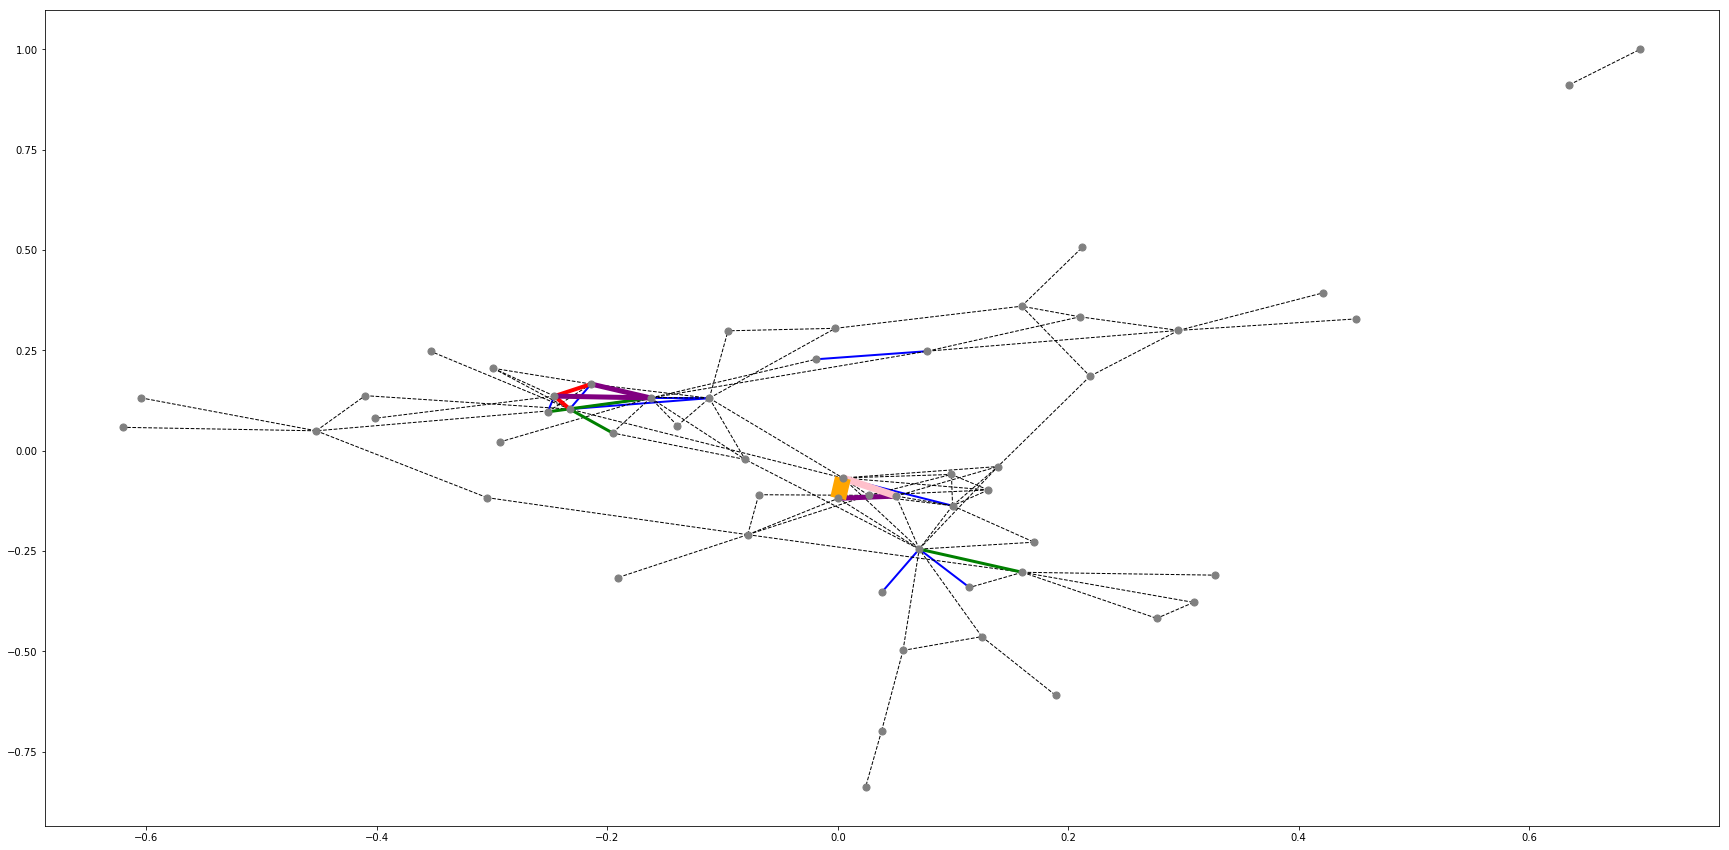

In [326]:

G = plt.figure(figsize=(30,15))
G = nx.Graph()

# adding the edges with the information from df_network_1
for i,j,w in zip(data["Fund1"],data["Fund2"],data["# Co-investments"]):
    G.add_edge(i,j,weight=w)

# weights represents the number of co-investments 
# the max values is 16 co-investments 
s1 = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] == 1]
s2 = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] == 2]
s3 = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] == 3]
s4 = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] == 4]
s5 = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] == 5]
s6 = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] == 7]
s7 = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] == 16]

pos = nx.spring_layout(G)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=50, node_color="gray")

# edges
nx.draw_networkx_edges(G, pos, edgelist=s2,width=2, alpha=1, edge_color='blue')

nx.draw_networkx_edges(G, pos, edgelist=s1,width=1, alpha=1, edge_color='black',style="dashed")

nx.draw_networkx_edges(G, pos, edgelist=s3,width=3, alpha=1, edge_color='green')

nx.draw_networkx_edges(G, pos, edgelist=s4,width=4, alpha=1, edge_color='red')

nx.draw_networkx_edges(G, pos, edgelist=s5,width=5, alpha=1, edge_color='purple')
    
nx.draw_networkx_edges(G, pos, edgelist=s6,width=7, alpha=1, edge_color='pink')

nx.draw_networkx_edges(G, pos, edgelist=s7,width=16, alpha=1, edge_color='orange')

plt.axis('on')


(-0.8126779144286174,
 1.0885305960824947,
 -0.7230088640434539,
 1.0393420400731515)

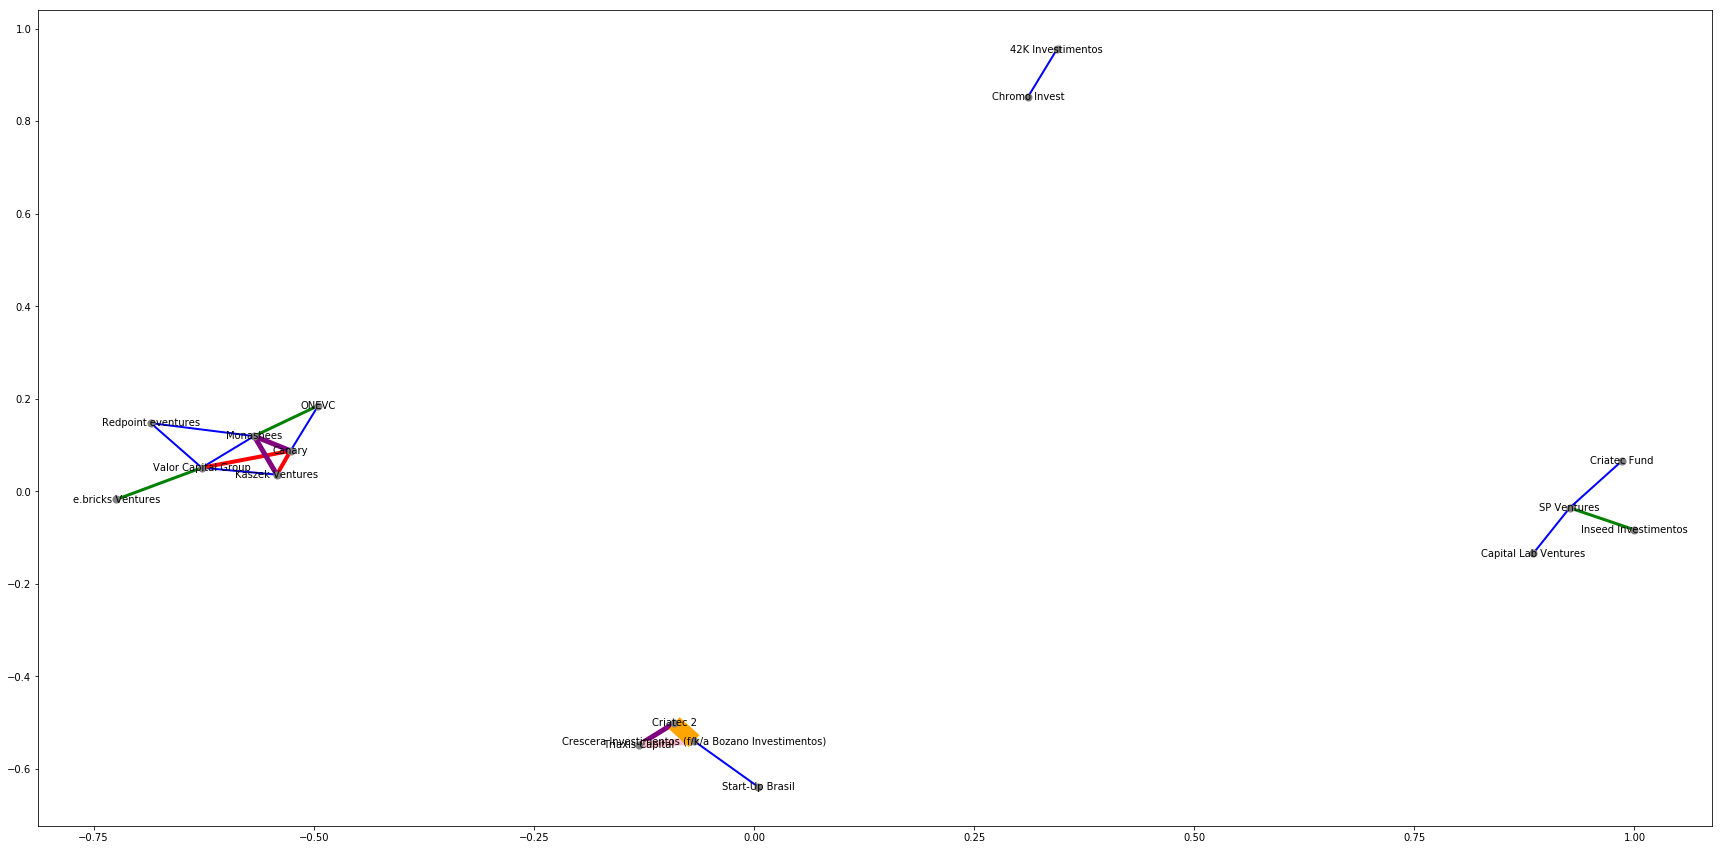

In [324]:

G = plt.figure(figsize=(30,15))
G = nx.Graph()

# adding the edges with the information from df_network_1
for i,j,w in zip(data2["Fund1"],data2["Fund2"],data2["# Co-investments"]):
    G.add_edge(i,j,weight=w)

# weights represents the number of co-investments 
# the max values is 16 co-investments 
s1 = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] == 1]
s2 = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] == 2]
s3 = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] == 3]
s4 = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] == 4]
s5 = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] == 5]
s6 = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] == 7]
s7 = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] == 16]

pos = nx.spring_layout(G)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=50, node_color="gray")

# edges
nx.draw_networkx_edges(G, pos, edgelist=s2,width=2, alpha=1, edge_color='blue')

nx.draw_networkx_edges(G, pos, edgelist=s1,width=1, alpha=1, edge_color='black',style="dashed")

nx.draw_networkx_edges(G, pos, edgelist=s3,width=3, alpha=1, edge_color='green')

nx.draw_networkx_edges(G, pos, edgelist=s4,width=4, alpha=1, edge_color='red')

nx.draw_networkx_edges(G, pos, edgelist=s5,width=5, alpha=1, edge_color='purple')
    
nx.draw_networkx_edges(G, pos, edgelist=s6,width=7, alpha=1, edge_color='pink')

nx.draw_networkx_edges(G, pos, edgelist=s7,width=16, alpha=1, edge_color='orange')

# labels
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

plt.axis('on')
